<a href="https://colab.research.google.com/github/nour-missaoui/Natural-Language-Processing-Specialization/blob/master/TunisianDialects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [1]:
import nltk                                # Python library for NLP
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import re   
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK

from nltk.stem import WordNetLemmatizer      # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings 
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
from collections import defaultdict
sw= stopwords.words('english') +  stopwords.words('french') +  stopwords.words('arabic')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Import Data**

In [2]:
train = pd.read_csv('/content/sample_data/Train (2).csv',encoding = 'utf-8')

# **Data Exploring**

In [3]:
train.head(5)

,ID,content,score
0,65479,Revoyez vos prix ainsi que la lenteur ke prend...,0
1,84256,تجربة ممتازة وشيقة فعلا تعاملاتهم محترمة ماعدا...,1
2,31581,دفو على نصابين,-1
3,58926,J arriver à temps et malheureusement je me re...,1
4,17945,Je suis contente des services rendu par Jumia....,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59408 entries, 0 to 59407
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       59408 non-null  int64 
 1   content  59408 non-null  object
 2   score    59408 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [5]:
train.isnull().sum()

ID         0
content    0
score      0
dtype: int64

# **Data Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

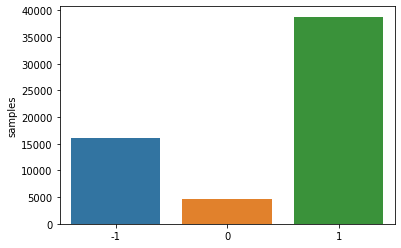

In [6]:
#let's check the class distribution.There are only two classes 0 and 1.

x=train.score.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

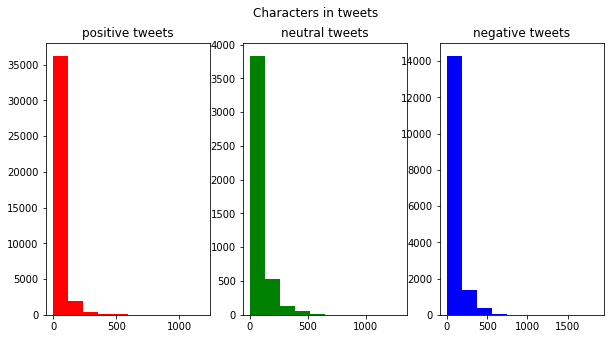

In [7]:
#Number of characters in tweets
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))
tweet_len=train[train['score']==1]['content'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('positive tweets')
tweet_len=train[train['score']==0]['content'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('neutral tweets')
tweet_len=train[train['score']==-1]['content'].str.len()
ax3.hist(tweet_len,color='blue')
ax3.set_title('negative tweets')

fig.suptitle('Characters in tweets')
plt.show()

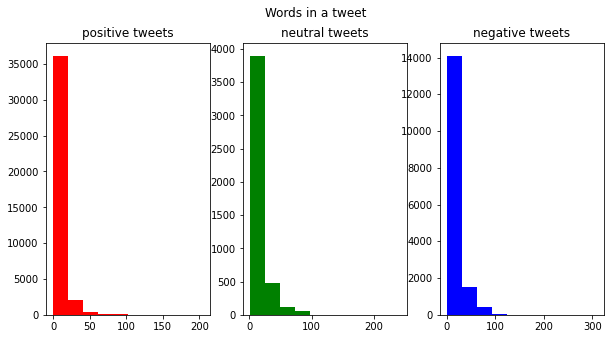

In [8]:
#Number of words in a tweet
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))
tweet_len=train[train['score']==1]['content'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('positive tweets')
tweet_len=train[train['score']==0]['content'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('neutral tweets')
tweet_len=train[train['score']==-1]['content'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='blue')
ax3.set_title('negative tweets')
fig.suptitle('Words in a tweet')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/

Text(0.5, 0.98, 'Average word length in each tweet')

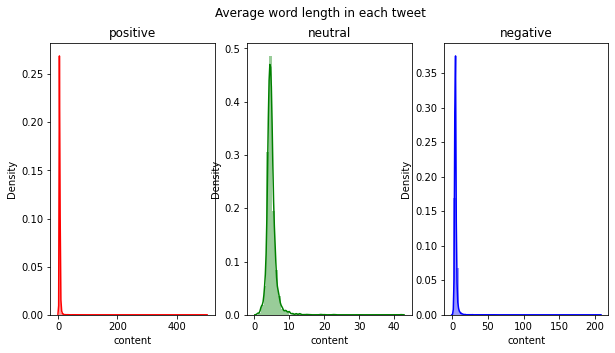

In [9]:
#Average word length in a tweet
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(10,5))
word=train[train['score']==1]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('positive')
word=train[train['score']==0]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('neutral')
word=train[train['score']==-1]['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='blue')
ax3.set_title('negative')
fig.suptitle('Average word length in each tweet')

In [10]:
#Common stopwords in tweets - 
def create_corpus(target):
    corpus=[]
    
    for x in train[train['score']==target]['content'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 50 artists>

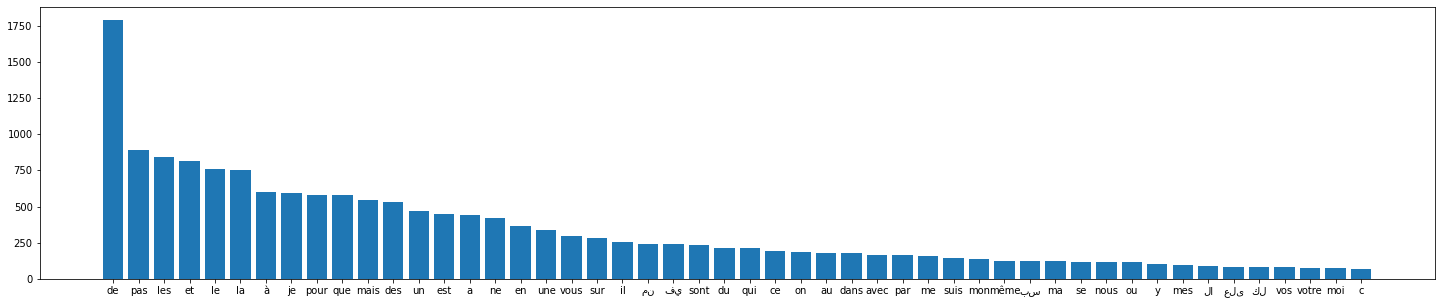

In [11]:
#analyze tweets with class 0.

stop=set(sw)
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:50] 

x,y=zip(*top)
plt.figure(figsize=(25,5))
plt.bar(x,y)

<BarContainer object of 50 artists>

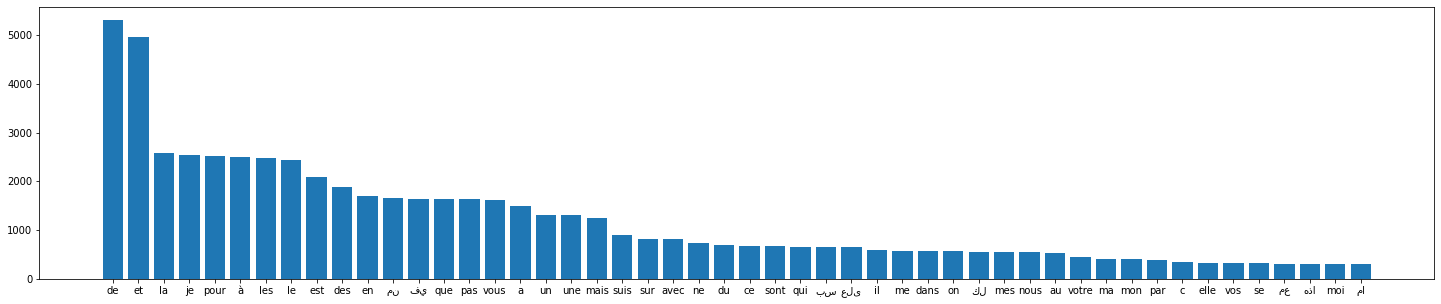

In [12]:
#analyze tweets with class 1.
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:50] 

x,y=zip(*top)
plt.figure(figsize=(25,5))
plt.bar(x,y)

<BarContainer object of 50 artists>

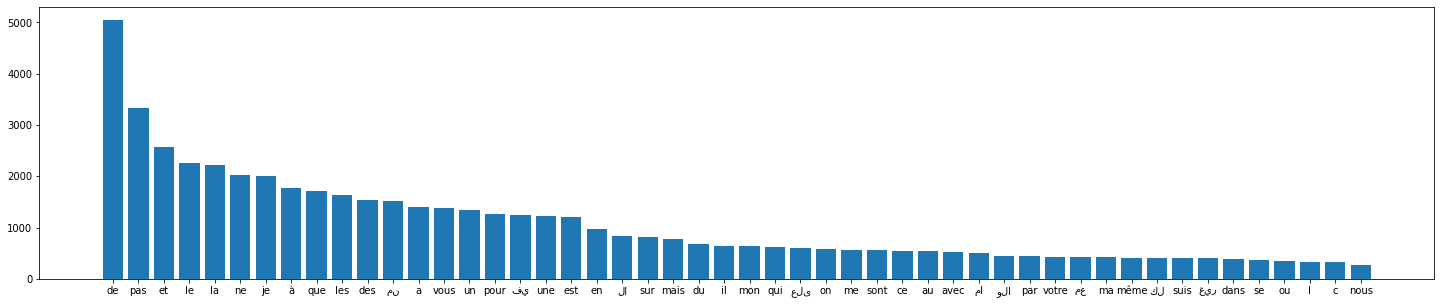

In [13]:
#analyze tweets with class -1.
corpus=create_corpus(-1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:50] 

x,y=zip(*top)
plt.figure(figsize=(25,5))
plt.bar(x,y)

<BarContainer object of 7 artists>

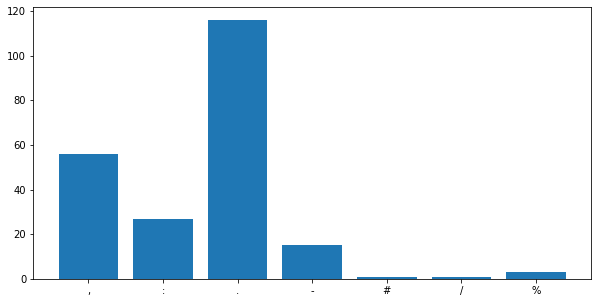

In [14]:
#Analyzing punctuations - Lets check class 0
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 9 artists>

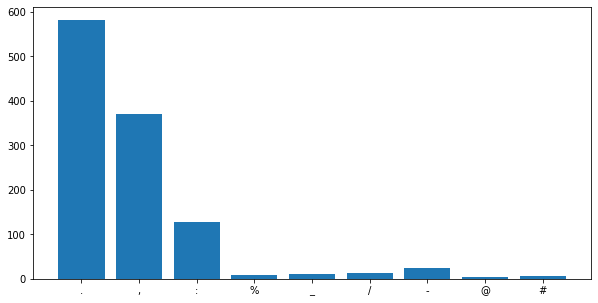

In [15]:
#Analyzing punctuations - Lets check class 1
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 8 artists>

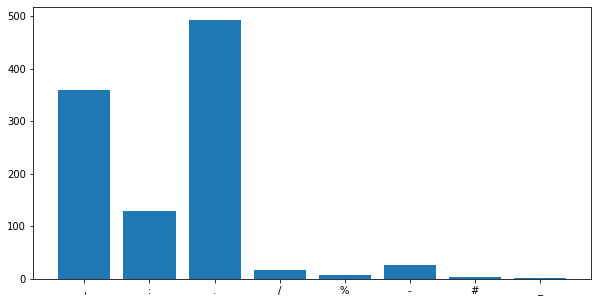

In [16]:
#Analyzing punctuations - Lets check class -1
plt.figure(figsize=(10,5))
corpus=create_corpus(-1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

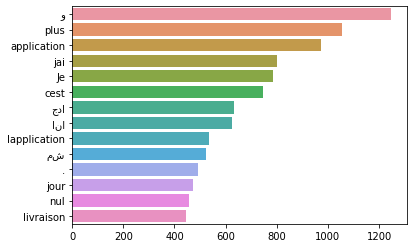

In [17]:
# Identify common words
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:50]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [18]:
#Ngram analysis
from sklearn.feature_extraction.text import CountVectorizer

#we will do a bigram (n=2) analysis over the tweets.
#Let's check the most common bigrams in tweets.
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

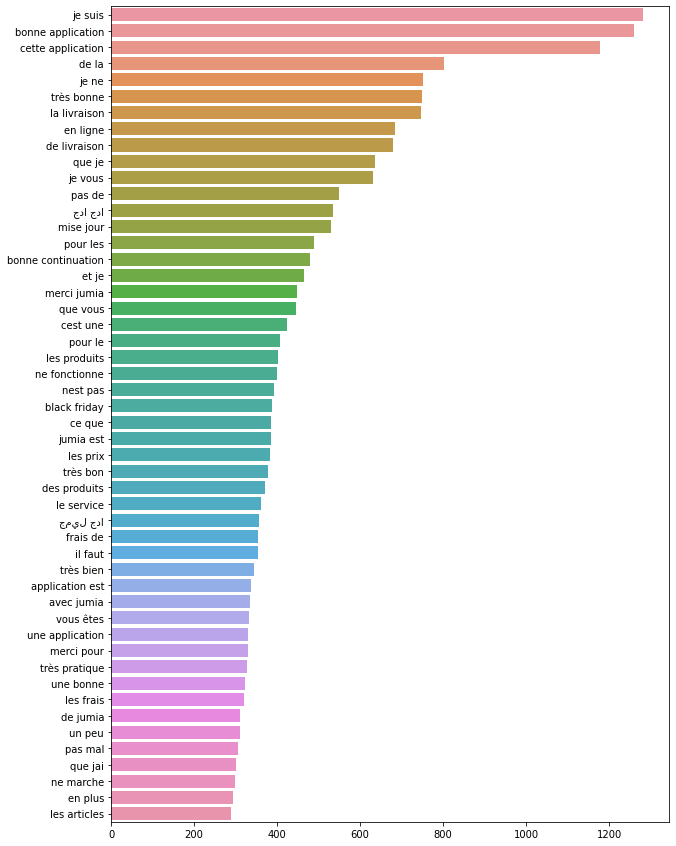

In [19]:
plt.figure(figsize=(10,15))
top_tweet_bigrams=get_top_tweet_bigrams(train['content'])[:50]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

# **Data Preprocessing**

In [20]:
def clean_data (tweet):
 # stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()
  sw= stopwords.words('english') +  stopwords.words('arabic') +  stopwords.words('french')
 #removelink
  tweet= re.sub(r'^RT[\s]+', '', tweet)
  tweet= re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet= re.sub(r'#', '', tweet)
  tweet= re.sub(r'@[A-Za-z0–9]+', '', tweet)
  tweet= re.sub(r'<.*?>', '', tweet)

  tokenizer = TweetTokenizer(preserve_case=False,  strip_handles=True, reduce_len=True)
  tweet_tokens = tokenizer.tokenize(tweet)
 
  tweets_clean = []
  for word in tweet_tokens:
      if (word not in sw): 
          lem_word=lemmatizer.lemmatize(word, pos="v")
         # stem_word = stemmer.stem(lem_word)  # stemming word
          tweets_clean.append(lem_word)

  return tweets_clean

In [21]:
train['content_clean'] = train.apply(lambda row : clean_data(row['content']), axis = 1) 

In [22]:
pip install python-bidi

In [23]:
pip install arabic_reshaper

In [ ]:
#see the word cloud with treated text
# -ve wordcloud
from wordcloud import WordCloud,STOPWORDS
from bidi.algorithm import get_display
import json


import arabic_reshaper

df_neg = train[train['score']==-1]['content_clean']
df_neg=df_neg.values.tolist()


s=''
for i in df_neg:
    s=s.join(i)
df_neg = arabic_reshaper.reshape(s)

df_neg = get_display(df_neg) 
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(','.join((map(str, df_neg))))

plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud,STOPWORDS
df_pos = train[train['score']==1]['content_clean']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(','.join((map(str, df_pos))))

plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud,STOPWORDS
df_neut = train[train['score']==0]['content_clean']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(','.join((map(str, df_neut))))

plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

# **Model**

## **convolutional neural network**

### **Build Dictionnary**

In [ ]:
# CNN eya
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, GlobalMaxPool1D
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D    

# define y and x
x=list(train['content'])
y=list(train['score'])

y=np.array(y)

# integer encode the documents
vocab_size = 13000
encoded_x = [one_hot(d, vocab_size) for d in x]
print(encoded_x[0:100])

# pad documents to a max length of 100 words
max_length = 100
padded_x = pad_sequences(encoded_x, maxlen=max_length, padding='post')
print(padded_x)

# define the model
embedding_dim = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# summarize the model
#print(model.summary())
# fit the model
print(model.fit(padded_x, y, epochs=10, verbose=0))

loss, accuracy = model.evaluate(padded_x,y,verbose=0)
print('Accuracy: %f' % (accuracy*100))